# PROJET IA MASTER 2 DS AUTEURS :
   #### SALHI Eya
   #### SILAL Aldjia
   #### LAHOUAR Samir
   #### TOURE MAMADOU

# PROJET IA DEEP FAKE

Notre Projet Deep consite à la detection de deepvoice. Notre choix a été motivé par l'incident du mardi 23 janvier au USA.
En effet, Dans les jours qui ont précédé les primaires Democrate, plusieurs électeurs ont reçu un appel téléphonique de Joe Biden, diffusant un message leur demandant de ne pas aller voter.
https://www.radiofrance.fr/franceinter/faux-vocaux-de-joe-biden-quand-l-ia-menace-la-campagne-presidentielle-americaine-1325525

Notre va consister à 2 modules :

    - Créer un module permettant de générer un fakevoice : Objectif étant de montrer comment les fakevoice sont crées
    - Créer un module de detection de fakevoice : L'objectif étant de protéger la population contre les fakenew.

## 1. GENERER UN FAKE VOICE

Dans cette partie nous allons générer un fakevoice du Président Barack Obama.
Pour ce faire nous allons adapter un projet open source devélopper par NVIDIA en 2020. le projet [TACOTRON](https://github.com/NVIDIA/tacotron2). Nous avons créer notre version [TACOTRON-IASCHOOL](https://github.com/toure32/ProjetIASchool) mis à jour. Nous utiliserons cette version pour notre projet.

<span style="color: red; font-size: 20px;">
    Attention :
    Il faut clonner le repo https://github.com/toure32/ProjetIASchool.git et deplacer ce notebook dans le repertoire ProjetIASchool et le relancer.
</span>

In [1]:
# Clonner le repos pour continuer
# git clone https://github.com/toure32/ProjetIASchool.git

In [2]:
pwd

'C:\\Users\\cirob\\projects\\ProjetIASchool\\VOICE_CLONING'

### 1.1 CONSTRUCTION DU DATASET

Nous téléchargons les discours de Obama depuis Youtube et les stocker sur le google drive. 
ils doivent être téléchargé et décompressé dans le repertoire obama_mp3/

In [5]:
!gdown https://drive.google.com/uc?id=1JJB_wPfuDFeicmaT6wFp7GPmz3WSUBBn

Downloading...
From (original): https://drive.google.com/uc?id=1JJB_wPfuDFeicmaT6wFp7GPmz3WSUBBn
From (redirected): https://drive.google.com/uc?id=1JJB_wPfuDFeicmaT6wFp7GPmz3WSUBBn&confirm=t&uuid=517d3bf6-45a2-4b49-9eb5-f08b521488f2
To: C:\Users\cirob\projects\ProjetIASchool\VOICE_CLONING\obama_mp3.zip

  0%|          | 0.00/1.01G [00:00<?, ?B/s]
  0%|          | 1.05M/1.01G [00:00<01:58, 8.57MB/s]
  0%|          | 2.10M/1.01G [00:00<02:17, 7.34MB/s]
  0%|          | 3.15M/1.01G [00:00<02:13, 7.59MB/s]
  0%|          | 4.19M/1.01G [00:00<02:03, 8.15MB/s]
  1%|          | 5.24M/1.01G [00:00<02:03, 8.15MB/s]
  1%|          | 6.29M/1.01G [00:00<02:13, 7.56MB/s]
  1%|          | 7.34M/1.01G [00:00<02:22, 7.06MB/s]
  1%|          | 8.39M/1.01G [00:01<02:18, 7.25MB/s]
  1%|          | 9.44M/1.01G [00:01<02:15, 7.40MB/s]
  1%|1         | 10.5M/1.01G [00:01<02:18, 7.24MB/s]
  1%|1         | 11.5M/1.01G [00:01<02:15, 7.41MB/s]
  1%|1         | 12.6M/1.01G [00:01<02:14, 7.47MB/s]
  1%|1         

Downloading...
From (original): https://drive.google.com/uc?id=1JJB_wPfuDFeicmaT6wFp7GPmz3WSUBBn
From (redirected): https://drive.google.com/uc?id=1JJB_wPfuDFeicmaT6wFp7GPmz3WSUBBn&confirm=t&uuid=9f525cab-51b5-4921-9606-3db89ff72403
To: C:\Users\cirob\projects\ProjetIASchool\VOICE_CLONING\obama_mp3.zip

  0%|          | 0.00/1.01G [00:00<?, ?B/s]
  0%|          | 524k/1.01G [00:00<04:48, 3.52MB/s]
  0%|          | 1.05M/1.01G [00:00<04:13, 4.00MB/s]
  0%|          | 2.10M/1.01G [00:00<03:23, 4.98MB/s]
  0%|          | 2.62M/1.01G [00:00<03:27, 4.87MB/s]
  0%|          | 3.67M/1.01G [00:00<03:06, 5.41MB/s]
  0%|          | 4.72M/1.01G [00:00<02:52, 5.87MB/s]
  1%|          | 5.77M/1.01G [00:01<02:41, 6.24MB/s]
  1%|          | 6.82M/1.01G [00:01<02:42, 6.21MB/s]
  1%|          | 7.86M/1.01G [00:01<02:35, 6.46MB/s]
  1%|          | 8.91M/1.01G [00:01<02:32, 6.58MB/s]
  1%|          | 9.96M/1.01G [00:01<02:37, 6.40MB/s]
  1%|1         | 11.0M/1.01G [00:01<02:45, 6.05MB/s]
  1%|1         |

In [12]:
!dir obama_mp3

 Le volume dans le lecteur C s'appelle Windows
 Le num‚ro de s‚rie du volume est 78A0-37CF

 R‚pertoire de C:\Users\cirob\projects\ProjetIASchool\VOICE_CLONING\obama_mp3

07/05/2024  01:13    <DIR>          .
10/05/2024  15:08    <DIR>          ..
06/05/2024  21:32         3ÿ532ÿ800 20170114_Weekly_Address.mp3
06/05/2024  21:31        56ÿ752ÿ128 20170118_President_Obama_Holds_Final_Press_Conference.mp3
06/05/2024  23:59        51ÿ256ÿ143 Obamas Full Speech To European Leaders About Russia.mp3
06/05/2024  23:57        61ÿ035ÿ134 President Obama Addresses the British Parliament.mp3
06/05/2024  23:25        54ÿ952ÿ574 President Obama Addresses the UN General Assembly.mp3
07/05/2024  01:01        46ÿ070ÿ106 President Obama Delivers Morehouse College Commencement Address.mp3
07/05/2024  00:07        46ÿ053ÿ178 President Obama Delivers Remarks on the 50th Anniversary of the Selma Marches.mp3
06/05/2024  23:19        18ÿ946ÿ226 President Obama FULL SPEECH on Strategy Against ISIS.mp3
06/05/20

In [2]:
#!pip install pydub

In [3]:
#!pip install SpeechRecognition

In [17]:
from pydub import AudioSegment, silence
from pydub.silence import split_on_silence, detect_silence
import math
import os

In [5]:
import pandas as pd
import speech_recognition as speach_r

In [6]:
from tqdm import tqdm
import IPython

In [13]:
def get_audio_files(directory_path = 'mp3'):
    """Permet de recupérer la liste des fichiers d'un repertoire"""
    files = []
    with os.scandir(directory_path) as entries:
        for entry in entries:
            if entry.is_file():
                files.append(entry.name)

    return files

In [8]:
def conver_to_wave(file_path = "path/to/your/file.mp3",out_dir='wave', id='A',index=0):
    """Convertir un fichier mp3 en WAV."""
    # Charger le fichier MP3
    audio = AudioSegment.from_mp3(file_path)

    # Durée de chaque bloc en millisecondes (4 secondes)
    block_duration = 3 * 1000

    # Nombre total de blocs
    total_blocks = math.ceil(len(audio) / block_duration)

    # Créer et sauvegarder chaque bloc
    for i in tqdm(range(total_blocks)):
        # Calculer le début et la fin de chaque bloc
        start_time = i * block_duration
        end_time = min((i + 1) * block_duration, len(audio))

        # Extraire le bloc
        block = audio[start_time:end_time]
        
        block = block.set_channels(1)
        block = block.set_frame_rate(22000)
        
        # Définir le nom du fichier de sortie pour le bloc actuel
        # block_file_name = f"output_block_{i+1}.wav"
        block_file_name = os.path.join(out_dir, f"{id+str(index)}_{i+1}.wav")
        # Exporter le bloc en tant que fichier WAV
        block.export(block_file_name, format="wav")

        #print(f"Block {i+1} saved as {block_file_name}")

Notre Fonction conver_to_wave() permet de convertir un fichier mp3 et block de wav de 3secondes. 
Aussi dans soucis de reduction de dimentionnalité, converti l'audio en Mono (Channel = 1) avec une frequence 22KHz (rate = 22000). Il faut préciser que les audio MP3 sont en stéréo (Channel 2) avec une fréquence de 44,1Khz ce qui peux demander des ressource de calcul énorme.

In [9]:
def get_audio_len(mp3_dir='mp3'):
    """Donne le durée en heure des fichier audio contenu dans un repertoire."""
    files = get_audio_files(directory_path = mp3_dir)
    durre_total = 0.0
    for file in tqdm(files):       
        audio = AudioSegment.from_file(f"{mp3_dir}/{file}")
        duree_ms = len(audio)
        duree_s = duree_ms / 1000.0
        durre_total = durre_total + duree_s
        
    return (durre_total / 3600)
        

In [10]:
def convert_audio(mp3_dir='mp3', out_dir='wave',id='A'):
    """Parcour un repertoire et converti tous les mp3 en wav"""
    files = get_audio_files(directory_path = mp3_dir)
    index=0
    for file in tqdm(files):
        #print(f"{mp3_dir}/{file}")
        index = index + 1
        conver_to_wave(file_path = f"{mp3_dir}/{file}",out_dir=out_dir,id=id,index=index)
    

Création des block wave de notre dataset

In [36]:
convert_audio(mp3_dir='obama_mp3', out_dir='obama_wave',id='O')

 34%|███████████████████████████                                                    | 219/640 [00:00<00:01, 227.64it/s]


 44%|██████████████████████████████████▊                                            | 422/957 [00:01<00:02, 215.54it/s]


 45%|██████████████████████████████████▉                                           | 489/1090 [00:02<00:02, 244.74it/s]


 70%|███████████████████████████████████████████████████████▍                       | 132/188 [00:00<00:00, 272.67it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [02:32<00:00,  5.64s/it]


In [35]:
dt = get_audio_len(mp3_dir='obama_mp3')
dt

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [01:31<00:00,  3.40s/it]


12.575750555555555

Une fois que nous avons créer les block wav de 3secondes de notre dataset on détermine la durée total des audio de notre dataset. On remarque ICI que nous avons 12.57heures d'audio. Il faut noter que les wav sont enregistré dans obama_wave

Pour la suite nous allons retranscrire tous nos wav en texte.

In [14]:
def transcript_voice(audio_file, lang = 'fr-FR'):
    """Permet de transcrire un audio en texte."""
    r = speach_r.Recognizer()
   
    with sr.AudioFile(audio_file) as source:        
        audio = r.record(source)

    # Essayer de reconnaître le contenu en utilisant Google Web Speech API
    try:
        transcript =  r.recognize_google(audio, language=lang)
        succes = True
    except sr.UnknownValueError:        
        transcript = None
        succes = False
    except sr.RequestError as e:        
        transcript = None
        succes = False
    
    return transcript, succes


In [15]:
#Transction et mettre sous forme de dataframe
def transcript_audio(wave_dir='wave',lang = 'fr-FR'):
    """Retranscipt tous les wav d'un repertoir et le mettre sous forme de datafram. retourne un dataframe pandas."""
    audios = get_audio_files(directory_path = wave_dir)
    transcription = []
    sucess = []
    for audio in tqdm(audios):
        audiofile = f"{wave_dir}/{audio}"
        text, state = transcript_voice(audio_file = audiofile, lang=lang)
        transcription.append(text)
        sucess.append(state)
    
    df = pd.DataFrame({'Audio': audios, 'Transcription': transcription, 'Sucess': sucess})
    return df
    

In [12]:
IPython.display.Audio('obama_wave/O1_1.wav')

In [39]:
transcript_voice('obama_wave/O1_1.wav', lang = 'en-US')

('this week I travelled to Chicago', True)

Le test de transcription nous motre que la transcription est réussi.

In [41]:
df = transcript_audio(wave_dir='obama_wave',lang = 'en-US')
df

100%|██████████████████████████████████████████████████████████████████████████| 15104/15104 [4:08:49<00:00,  1.01it/s]


Audio                                      Transcription  Sucess
0        O10_1.wav                               good evening tonight    True
1       O10_10.wav       American people in our history the images of    True
2      O10_100.wav                 remain vigilant at home and Abroad    True
3      O10_101.wav                              as we do we must also    True
4      O10_102.wav  firm that the United States is not and never w...    True
...            ...                                                ...     ...
15099    O9_95.wav                                               None   False
15100    O9_96.wav                                               None   False
15101    O9_97.wav         continue to work closely with Congress how    True
15102    O9_98.wav  how is not the time to move forward on new san...    True
15103    O9_99.wav  because doing so with derail this promising fi...    True

[15104 rows x 3 columns]

In [42]:
df.to_csv('obama.csv', index=False)

Une fois que nous avons notre dataframe nous l'enregistrons au format CSV. A cette étape nous avons construit notre dataset.
Nouns allons maintenant procéder a l'entrainement de notre model tacotron.

### 1.2 ENTRAINEMENT DU MODEL

In [16]:
pwd

'C:\\Users\\cirob\\projects\\ProjetIASchool\\VOICE_CLONING'

On charge notre CSV des transcriptions créer lors de la constitution du dataset.
Une fois le dataframe chargé on garde que les lignes ou les transcriptions on reussi (Success=True). Ensuite nous allons constituer notre train (90% du dataset) set et test set (10% du dataset).

In [14]:
metadata = pd.read_csv('obama.csv')
metadata = metadata[metadata['Sucess']]
metadata

Audio                                      Transcription  Sucess
0        O10_1.wav                               good evening tonight    True
1       O10_10.wav       American people in our history the images of    True
2      O10_100.wav                 remain vigilant at home and Abroad    True
3      O10_101.wav                              as we do we must also    True
4      O10_102.wav  firm that the United States is not and never w...    True
...            ...                                                ...     ...
15097    O9_93.wav  over the last few years Congress has been a ke...    True
15098    O9_94.wav  closing sanctions on the Iranian government an...    True
15101    O9_97.wav         continue to work closely with Congress how    True
15102    O9_98.wav  how is not the time to move forward on new san...    True
15103    O9_99.wav  because doing so with derail this promising fi...    True

[12052 rows x 3 columns]

In [15]:
total = len(metadata)
split = 0.9
train = int(total * split)

train_metadata = metadata[:train]
val_metadata = metadata[train:]

In [16]:
train_metadata

Audio                                      Transcription  Sucess
0        O10_1.wav                               good evening tonight    True
1       O10_10.wav       American people in our history the images of    True
2      O10_100.wav                 remain vigilant at home and Abroad    True
3      O10_101.wav                              as we do we must also    True
4      O10_102.wav  firm that the United States is not and never w...    True
...            ...                                                ...     ...
13505   O6_175.wav                   for the suits you wore his class    True
13506   O6_176.wav                                    call them tweed    True
13507   O6_177.wav              what is education at Moorhouse helped    True
13508   O6_178.wav                                     the discipline    True
13509   O6_179.wav               compassion the soul force that would    True

[10846 rows x 3 columns]

In [17]:
val_metadata

Audio                                      Transcription  Sucess
13510   O6_18.wav                             one of my dear friends    True
13511  O6_180.wav                                       warm America    True
13512  O6_181.wav  I was here that he was introduced to the writi...    True
13513  O6_182.wav                                     and parole and    True
13514  O6_183.wav                                 civil disobedience    True
...           ...                                                ...     ...
15097   O9_93.wav  over the last few years Congress has been a ke...    True
15098   O9_94.wav  closing sanctions on the Iranian government an...    True
15101   O9_97.wav         continue to work closely with Congress how    True
15102   O9_98.wav  how is not the time to move forward on new san...    True
15103   O9_99.wav  because doing so with derail this promising fi...    True

[1206 rows x 3 columns]

Il faut se placer dans le repertoire tacotron2 pour la suite

In [4]:
%cd tacotron2

C:\Users\cirob\projects\ProjetIASchool\tacotron2


Une fois que nous avons les train et test set nous devons créer les train.txt et test.txt pour tacotrons dans le répertoire filelists. ces fichiers txt doivent contenir des lignes au format suivant :
    <b>chemin/fichier.wav|transcription </b>

Pour notre entrainement nous créons les fichiers obama_train.txt (pour le train) et obama_test.txt (pour le test) 

In [19]:
with open('filelists/obama_train.txt', 'w') as f:
    for _, (audio, text, _) in train_metadata.iterrows():
        filepath = f"../obama_wave/{audio}"
        #print(filepath + '|' + text)
        f.write(filepath + '|' + text + '\n')
        
with open('filelists/obama_test.txt', 'w') as f:
    for _, (audio, text, _) in val_metadata.iterrows():
        filepath = f"../obama_wave/{audio}"
        #print(filepath + '|' + text)
        f.write(filepath + '|' + text + '\n')

TACOTRON met a disposition un modèl préentrainé en anglais qui peut être utiliser pour le transfert learning.
Ce modèle est disponible sur notre [google drive](https://drive.google.com/file/d/1ZsOurEVD8RzTdvzyto8vM7-8NLWzL2zR/view?usp=sharing)

In [229]:
# On télécharge le modèle préentrainé
!gdown https://drive.google.com/uc?id=1ZsOurEVD8RzTdvzyto8vM7-8NLWzL2zR

Downloading...
From (original): https://drive.google.com/uc?id=1ZsOurEVD8RzTdvzyto8vM7-8NLWzL2zR
From (redirected): https://drive.google.com/uc?id=1ZsOurEVD8RzTdvzyto8vM7-8NLWzL2zR&confirm=t&uuid=fccc8250-4447-4169-ba3b-c0acdee8abb3
To: C:\Users\cirob\projects\ProjetIASchool\VOICE_CLONING\tacotron2_statedict.pt

  0%|          | 0.00/113M [00:00<?, ?B/s]
  0%|          | 524k/113M [00:00<00:22, 4.98MB/s]
  1%|          | 1.05M/113M [00:00<00:29, 3.74MB/s]
  2%|1         | 2.10M/113M [00:00<00:23, 4.80MB/s]
  3%|2         | 3.15M/113M [00:00<00:21, 5.21MB/s]
  4%|3         | 4.19M/113M [00:00<00:17, 6.14MB/s]
  5%|4         | 5.24M/113M [00:00<00:17, 6.17MB/s]
  6%|5         | 6.29M/113M [00:01<00:16, 6.41MB/s]
  7%|6         | 7.34M/113M [00:01<00:16, 6.42MB/s]
  7%|7         | 8.39M/113M [00:01<00:16, 6.28MB/s]
  8%|8         | 9.44M/113M [00:01<00:14, 6.98MB/s]
  9%|9         | 10.5M/113M [00:01<00:14, 7.25MB/s]
 10%|#         | 11.5M/113M [00:01<00:13, 7.66MB/s]
 11%|#1        | 12.

On lance l'entrainement. il faut notez que notre entrainement a durée 1 semaine pour un epoch de 1000

In [20]:
!python train.py --output_directory=out_obama --log_directory=logdir -c tacotron2_statedict.pt --warm_start

^C


Observer l'entrainemnt. nous utilison l'outil tensorboard de tensorflow pour observer les métric d'entrainement.

In [20]:
!tensorboard --logdir=out_obama

^C


![Train Loss](train_loss.png)

Le graphique montre l'évolution du training loss de notre modèle au cours des itérations. Voici une interprétation des éléments clés du graphique :

Axe des abscisses (X) : Il représente le nombre d'itérations ou de pas d'entraînement. Plus on avance vers la droite, plus on a effectué d'itérations.

Axe des ordonnées (Y) : Il représente la valeur de la perte de l'entraînement. Une valeur plus basse indique une meilleure performance du modèle sur les données d'entraînement.

Tendance générale : La courbe montre une tendance générale à la baisse, ce qui est attendu et souhaitable. Cela signifie que le modèle apprend et s'améliore au fur et à mesure que l'entraînement progresse.

Variabilité : On observe une certaine variabilité ou oscillation autour de la tendance principale. Cela peut être dû à plusieurs facteurs, tels que les fluctuations dans les mini-batchs de données, les taux d'apprentissage, ou même des ajustements dans les hyperparamètres du modèle.

Début de l'entraînement : Au début (à gauche), la perte commence assez haute (autour de 0.44) puis diminue rapidement, ce qui est typique lorsque le modèle commence à apprendre les structures de base des données.

Stabilisation : Après une forte baisse initiale, la perte continue de diminuer mais à un rythme plus lent, indiquant que le modèle affine ses paramètres pour mieux correspondre aux données d'entraînement.

Plateau et fluctuations finales : Vers la fin de la courbe (à droite), la perte semble se stabiliser autour de 0.35 avec des fluctuations, ce qui peut suggérer que le modèle atteint un point de saturation où les améliorations deviennent marginales.

<b>Conclusions</b>

Bonne performance initiale : Le modèle montre une bonne capacité d'apprentissage initiale avec une diminution rapide de la perte.
Stabilisation : Une fois que le modèle a appris les structures de base, les améliorations deviennent plus graduelles.

Oscillations : Les oscillations autour de la tendance peuvent nécessiter un ajustement du taux d'apprentissage ou d'autres hyperparamètres pour lisser la convergence.

Si ces oscillations persistent, il pourrait être utile d'explorer des techniques comme le déclin du taux d'apprentissage, l'utilisation de méthodes de régularisation, ou des ajustements dans la taille des batchs pour améliorer encore la performance et la stabilité du modèle.


![Validation Loss](val_loss.png)

Le graphique montre l'évolution de la validation loss du modèle au cours des itérations. Voici une interprétation des éléments clés du graphique :

Axe des abscisses (X) : Il représente le nombre d'itérations ou de pas d'entraînement. Plus on avance vers la droite, plus on a effectué d'itérations.

Axe des ordonnées (Y) : Il représente la valeur de la perte de validation. Une valeur plus basse indique une meilleure performance du modèle sur les données de validation, ce qui n'ont pas été utilisées pour entraîner le modèle.

Tendance générale : La courbe montre une forte diminution initiale de la perte, suivie d'une stabilisation à une valeur relativement basse.

Début de l'entraînement : Au début (à gauche), la perte commence très haute (autour de 26) puis diminue très rapidement. Cela indique que le modèle s'adapte initialement très bien aux données de validation.

Stabilisation : Après cette forte diminution initiale, la courbe se stabilise à une valeur proche de 1,5. Cela signifie que le modèle a atteint une performance stable et ne s'améliore plus de manière significative sur les données de validation.

Absence d'oscillations : Contrairement à la courbe de perte d'entraînement, la courbe de perte de validation montre beaucoup moins d'oscillations, ce qui peut indiquer une généralisation correcte du modèle.

<b>Conclusions</b>

Forte diminution initiale : Le modèle s'adapte très rapidement et de manière efficace aux données de validation au début de l'entraînement.
Bonne généralisation : La perte de validation se stabilise rapidement et reste basse, suggérant que le modèle ne souffre pas de surapprentissage (overfitting).
Performance stable : La perte de validation ne montre pas de tendances à la hausse, ce qui est un signe positif indiquant que le modèle n'est pas en train de se dégrader sur les nouvelles données.

Globalement, ce graphique indique que le modèle a été bien entraîné et qu'il se généralise correctement aux données de validation, ce qui est un bon indicateur de sa performance potentielle sur des données nouvelles et non vues.


![Alignement](aligement.png)
Le graphique montre un alignement entre les étapes encodeur et décodeur, généralement utilisé dans les modèles de type seq2seq (séquence à séquence), tels que ceux utilisés pour la synthèse vocale ou la traduction automatique. Voici une interprétation des différents éléments de ce graphique :

<b>Description du Graphique</b>

Axe des abscisses (X) : Decoder Timestep Représente les étapes de temps du décodeur.
Axe des ordonnées (Y) : Encoder Timestep Représente les étapes de temps de l'encodeur.

<b>Échelle de couleurs</b>

Les couleurs indiquent les scores d'alignement ou les poids d'attention entre les étapes de l'encodeur et du décodeur. Une couleur plus claire (proche du jaune) indique un score d'alignement plus élevé.

<b>Interprétation<b>
        
Alignement Diagonal:
    Une ligne diagonale bien définie du coin inférieur gauche au coin supérieur droit suggère un alignement séquentiel réussi entre l'encodeur et le décodeur. Cela signifie que chaque étape du décodeur est bien alignée avec les étapes correspondantes de l'encodeur.

Intensité de l'alignement:
    La couleur jaune le long de la diagonale indique des scores d'alignement élevés, ce qui signifie que le modèle accorde une grande attention à ces paires de timesteps encodeur-décodeur spécifiques.
Les régions plus sombres indiquent des scores d'alignement plus faibles, ce qui est normal en dehors de la principale trajectoire diagonale.

Bruits et Perturbations:
    Quelques points de couleur claire (haute attention) peuvent apparaître en dehors de la diagonale principale, indiquant des alignements sporadiques. Cela peut être dû à des caractéristiques spécifiques dans les données qui attirent l'attention du modèle à des moments précis.
    
<b>Conclusions<b>
    
Bon Alignement : 
    La présence d'une diagonale claire et continue suggère que le modèle effectue correctement l'alignement entre les étapes de l'encodeur et du décodeur, ce qui est crucial pour des tâches comme la synthèse vocale ou la traduction.
Cohérence : 
    La cohérence de l'alignement diagonal montre que le modèle suit une séquence temporelle logique, ce qui est souhaitable pour maintenir la fluidité et la cohérence dans les sorties séquentielles.
Améliorations Potentielles : 
    Bien que l'alignement soit bon, l'apparition de quelques points clairs en dehors de la diagonale peut être explorée pour comprendre s'il s'agit de bruit ou de caractéristiques importantes que le modèle capture.

Globalement, ce graphique d'alignement montre que le modèle fonctionne bien dans l'appariement des étapes de l'encodeur et du décodeur, ce qui est un signe positif pour la qualité des prédictions séquentielles.



![Spectre](mel.png)
Les graphiques affichent des spectrogrammes mel pour évaluer la performance de notre modèle de conversion texte-à-parole. Voici une interprétation des deux spectrogrammes, intitulés "mel_predicted" et "mel_target" :

<b>Description des Spectrogrammes</b>

Axes des abscisses (X) : Frames Chaque point sur l'axe des abscisses représente une unité de temps (frame).
Axes des ordonnées (Y) : Channels Chaque point sur l'axe des ordonnées représente une fréquence, décomposée en différents canaux de fréquence.

<b>Échelle de couleurs</b>

Les couleurs représentent l'amplitude ou l'intensité du signal à chaque fréquence et chaque point dans le temps. Plus la couleur est claire, plus l'amplitude est élevée.

<b>Interprétation</b>

mel_predicted : Ce graphique représente le spectrogramme généré par le modèle après 93 200 itérations.
On peut observer des motifs distincts de variations en fréquence, ce qui indique les composantes fréquentielles du signal audio généré. La qualité du spectrogramme prédit peut être évaluée en comparant directement ses motifs et ses détails avec ceux du spectrogramme cible.

mel_target : Ce graphique représente le spectrogramme cible ou de référence, auquel le modèle tente de se conformer. Il montre le spectrogramme attendu pour une performance idéale, servant de norme pour l'évaluation.

<b>Comparaison entre "mel_predicted" et "mel_target" </b>

Similarités : Les deux spectrogrammes présentent des motifs similaires, ce qui indique que le modèle réussit à capturer les principales caractéristiques fréquentielles du signal cible. Les zones de haute intensité (en jaune) sont à des positions correspondantes dans les deux graphiques, suggérant que le modèle génère des sons avec des fréquences et des amplitudes proches de celles du signal cible.

Différences : Il peut y avoir des différences subtiles dans les détails des spectrogrammes, telles que des variations dans l'intensité ou des légères différences de position des motifs. Ces différences peuvent indiquer des zones où le modèle pourrait encore s'améliorer, notamment en affinant la génération de certaines fréquences ou en réduisant le bruit.

<b>Conclusions</b>

Bonne Performance Générale : Le modèle semble bien capturer les motifs principaux du spectrogramme cible, indiquant une bonne performance générale.

Améliorations Possibles : Les différences subtiles observées peuvent être des points d'amélioration potentielle pour le modèle, en ajustant des hyperparamètres ou en ajoutant des techniques de régularisation pour mieux correspondre aux détails du spectrogramme cible.

Globalement, ces spectrogrammes indiquent que le modèle de synthèse vocale ou de conversion texte-à-parole fonctionne correctement mais pourrait encore être amélioré pour obtenir une correspondance plus précise avec le spectrogramme cible.


#### Fin Entrainement

A la fin de l'entrainement nous avons stocker notre modèle sur [google drive](https://drive.google.com/file/d/1T675mD9cHdFODR2oZBgVz3CmArt5ODc4/view?usp=sharing).
Il faut faut le télécharger et et le charger pour pouvoir faire l'inférance (générer) d'un audio.

### 1.3 GENERER UN AUDIO

###### Principe :
Notre modèle TACOTRON sera utilisé pour générer le sepectre en fonction du texte fourni.
Le spectre généré est utilisé en entrée de du modèle WAVEGLOW pour générer l'audio WAV.

In [27]:
pwd

'C:\\Users\\cirob\\projects\\ProjetIASchool\\VOICE_CLONING\\tacotron2'

On télécharge notre modèle entrainé

In [26]:
!gdown https://drive.google.com/uc?id=1T675mD9cHdFODR2oZBgVz3CmArt5ODc4

Downloading...
From (original): https://drive.google.com/uc?id=1T675mD9cHdFODR2oZBgVz3CmArt5ODc4
From (redirected): https://drive.google.com/uc?id=1T675mD9cHdFODR2oZBgVz3CmArt5ODc4&confirm=t&uuid=c9dbbf7a-cdca-47a4-88a1-75f2b2166e89
To: C:\Users\cirob\projects\ProjetIASchool\VOICE_CLONING\tacotron2\checkpoint_epoch_1000

  0%|          | 0.00/338M [00:00<?, ?B/s]
  0%|          | 524k/338M [00:00<01:06, 5.07MB/s]
  0%|          | 1.05M/338M [00:00<01:08, 4.91MB/s]
  0%|          | 1.57M/338M [00:00<01:11, 4.71MB/s]
  1%|          | 2.62M/338M [00:00<01:02, 5.34MB/s]
  1%|          | 3.15M/338M [00:00<01:03, 5.30MB/s]
  1%|1         | 4.19M/338M [00:00<01:04, 5.22MB/s]
  1%|1         | 4.72M/338M [00:00<01:04, 5.21MB/s]
  2%|1         | 5.77M/338M [00:01<01:08, 4.86MB/s]
  2%|2         | 6.82M/338M [00:01<01:02, 5.29MB/s]
  2%|2         | 7.86M/338M [00:01<01:00, 5.45MB/s]
  3%|2         | 8.91M/338M [00:01<00:59, 5.55MB/s]
  3%|2         | 9.96M/338M [00:01<00:57, 5.73MB/s]
  3%|3     

Le sous module WAVEGLOW de TACOTRON utilisé pour générer les audio est fourni avec un modèl préentrainé. 
disponible [ICI](https://drive.google.com/file/d/1lAQkKd0RO0mSa3wp9ei0kO7KGDZ6CX5C/view?usp=sharing)

In [230]:
#Télécharger le modèle WAVEGLOW
!gdown https://drive.google.com/uc?id=1lAQkKd0RO0mSa3wp9ei0kO7KGDZ6CX5C

Downloading...
From (original): https://drive.google.com/uc?id=1lAQkKd0RO0mSa3wp9ei0kO7KGDZ6CX5C
From (redirected): https://drive.google.com/uc?id=1lAQkKd0RO0mSa3wp9ei0kO7KGDZ6CX5C&confirm=t&uuid=133efead-66be-497b-a887-36bcfe2dd3ab
To: C:\Users\cirob\projects\ProjetIASchool\VOICE_CLONING\waveglow_256channels_universal_v5.pt

  0%|          | 0.00/676M [00:00<?, ?B/s]
  0%|          | 1.05M/676M [00:00<02:10, 5.19MB/s]
  0%|          | 2.10M/676M [00:00<01:48, 6.19MB/s]
  0%|          | 3.15M/676M [00:00<01:43, 6.49MB/s]
  1%|          | 4.19M/676M [00:00<01:45, 6.35MB/s]
  1%|          | 5.24M/676M [00:00<01:50, 6.08MB/s]
  1%|          | 6.29M/676M [00:01<01:49, 6.11MB/s]
  1%|1         | 7.34M/676M [00:01<01:43, 6.48MB/s]
  1%|1         | 8.39M/676M [00:01<01:48, 6.17MB/s]
  1%|1         | 9.44M/676M [00:01<01:44, 6.40MB/s]
  2%|1         | 10.5M/676M [00:01<01:44, 6.40MB/s]
  2%|1         | 11.5M/676M [00:01<01:42, 6.49MB/s]
  2%|1         | 12.6M/676M [00:01<01:43, 6.43MB/s]
  2%|

In [37]:
from multiprocessing import Pool
import matplotlib.pylab as plt
%matplotlib inline
from tqdm.notebook import tqdm
import IPython.display as ipd
from time import time, sleep
import scipy.io.wavfile
import numpy as np
import matplotlib
import torch
import sys
import scipy.io.wavfile as wavfile

sys.path.append('waveglow/')

from audio_processing import griffin_lim
from layers import TacotronSTFT, STFT
from hparams import create_hparams
from text import text_to_sequence
from denoiser import Denoiser
from train import load_model
from model import Tacotron2
from glow import WaveGlow

In [29]:
def plot_data(data, figsize=(16, 4)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='lower', interpolation='none')

In [30]:
# On crée les hyper parametre on utilise les mêmes que nous avons utiliser pour l'entrainement
hparams = create_hparams()
hparams.sampling_rate = 22000

Ici on instancie notre modèl, checkpoint_path fait référence à notre fichier d'entrainement.

In [31]:
checkpoint_path = "checkpoint_epoch_1000"
model = load_model(hparams)
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])
_ = model.cuda().eval().half()

In [32]:
# On charge le fichier pré entrainer waveglow
waveglow_path = 'waveglow_256channels_universal_v5.pt'
waveglow = torch.load(waveglow_path)['model']
waveglow.cuda().eval()
for k in waveglow.convinv:
    k.float()
denoiser = Denoiser(waveglow)

C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'glow.WaveGlow' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or

In [34]:
def synthesize(word, n=5, cleaners=['english_cleaners'], sigma=0.666, strength=0.01):
    """Génère la voix en fonction du text entré."""
    sequence = np.array(text_to_sequence(word, cleaners))[None, :]
    sequence = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
    #print(sequence)
    with torch.no_grad():
        mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)        
    audio = waveglow.infer(mel_outputs_postnet.type(torch.float32), sigma=sigma)
    audio_denoised = denoiser(audio, strength=strength)[:, 0]
    audio = audio[0].data.cpu().numpy().tolist()
    mel_outputs = mel_outputs.float().data.cpu().numpy()[0]
    mel_outputs_postnet = mel_outputs_postnet.float().data.cpu().numpy()[0]
    alignments = alignments.float().data.cpu().numpy()[0]
    return audio, mel_outputs, mel_outputs_postnet, alignments

In [46]:
# Texte à synthétiser
tests = [
         "A I school is really awesome. And I will send my childen there." ,
         "I will recommand it to all america",
         "And I recommend that America adopts their policy in education."     
]

In [48]:
index = 0
for text in tests:
    audio, mel_outputs, mel_outputs_postnet, alignments = synthesize(text)    
    ipd.display_html(ipd.HTML(f"""<h3>{text}</h3><br/>"""))
    ipd.display(ipd.Audio(data = audio, rate = hparams.sampling_rate, autoplay = False))
    index = index + 1

A I school is really awesome. And I will send my childen there.

I will recommand it to all america

And I recommend that America adopts their policy in education.

Nous enregistrons les fichiers wav générés dans le repertoire racine sous les noms respective obama_1, obama_2, et obama_3

## 2. DETECTION DE FAKE VOICE
Les fichies audio utiliser pour entrainer notre modèle de detection fake voice sont disponible [ICI](https://drive.google.com/file/d/11-hzhMPR50KnYyYwOIL-AECaZ_1BX2eR/view?usp=sharing).
Les fichiers audios utiliés pour tester notre modèle sont disponible [ICI](https://drive.google.com/file/d/1KRrtw-QbDAqC_bcS1fUFWbudsS6ylfBV/view?usp=sharing).
Ces 2 archives doiventre téléchargés et decompressé dans le répertoire racine.

In [49]:
%cd ..

C:\Users\cirob\projects\ProjetIASchool\VOICE_CLONING


In [2]:
# Télécharger les Audios
!gdown https://drive.google.com/uc?id=11-hzhMPR50KnYyYwOIL-AECaZ_1BX2eR

Downloading...
From (original): https://drive.google.com/uc?id=11-hzhMPR50KnYyYwOIL-AECaZ_1BX2eR
From (redirected): https://drive.google.com/uc?id=11-hzhMPR50KnYyYwOIL-AECaZ_1BX2eR&confirm=t&uuid=1c655c98-37c3-4907-9c55-0d4695c3f176
To: C:\Users\cirob\projects\ProjetIASchool\AUDIO.zip

  0%|          | 0.00/3.98G [00:00<?, ?B/s]
  0%|          | 2.62M/3.98G [00:00<02:37, 25.2MB/s]
  0%|          | 6.29M/3.98G [00:00<02:15, 29.3MB/s]
  0%|          | 9.96M/3.98G [00:00<02:05, 31.5MB/s]
  0%|          | 13.1M/3.98G [00:00<02:06, 31.3MB/s]
  0%|          | 16.8M/3.98G [00:00<02:06, 31.4MB/s]
  1%|          | 19.9M/3.98G [00:00<02:18, 28.5MB/s]
  1%|          | 23.1M/3.98G [00:00<02:16, 29.0MB/s]
  1%|          | 26.2M/3.98G [00:00<02:16, 28.9MB/s]
  1%|          | 29.4M/3.98G [00:01<02:31, 26.1MB/s]
  1%|          | 32.5M/3.98G [00:01<02:30, 26.2MB/s]
  1%|          | 35.7M/3.98G [00:01<02:28, 26.5MB/s]
  1%|          | 38.8M/3.98G [00:01<02:28, 26.5MB/s]
  1%|1         | 41.9M/3.98G [00:

In [3]:
# Télécharger les fichier de test 
!gdown https://drive.google.com/uc?id=1KRrtw-QbDAqC_bcS1fUFWbudsS6ylfBV

Downloading...
From: https://drive.google.com/uc?id=1KRrtw-QbDAqC_bcS1fUFWbudsS6ylfBV
To: C:\Users\cirob\projects\ProjetIASchool\DEMONSTRATION.zip

  0%|          | 0.00/2.23M [00:00<?, ?B/s]
100%|##########| 2.23M/2.23M [00:00<00:00, 26.9MB/s]


In [50]:
!pip install resampy

In [51]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
audio_files_path = "AUDIO/"

In [53]:
folders = os.listdir(audio_files_path)
print(folders)

['FAKE', 'REAL']


In [54]:
real_audio = "./DEMONSTRATION/linus-original-DEMO.mp3"
fake_audio = "./DEMONSTRATION/linus-to-musk-DEMO.mp3"

### 2.1 Visualization

In [55]:
print("Real Audio:")
IPython.display.Audio(real_audio)

Real Audio:


In [56]:
print("Fake Audio:")
IPython.display.Audio(fake_audio)

Fake Audio:


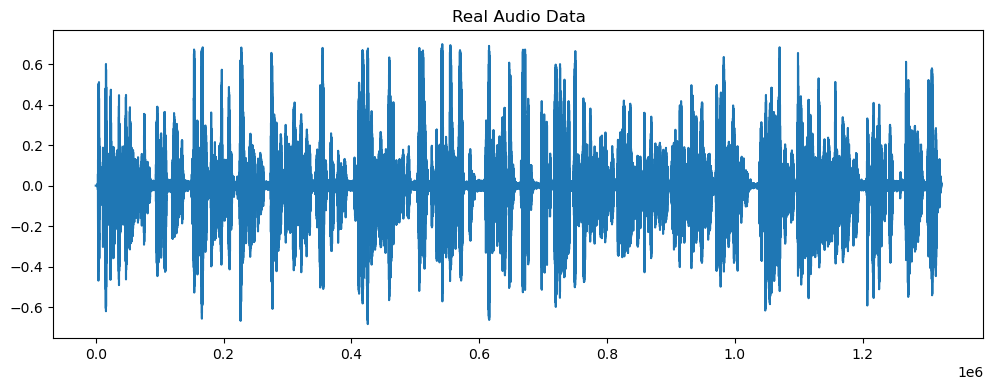

In [57]:
real_ad, real_sr = librosa.load(real_audio)
plt.figure(figsize=(12, 4))
plt.plot(real_ad)
plt.title("Real Audio Data")
plt.show()

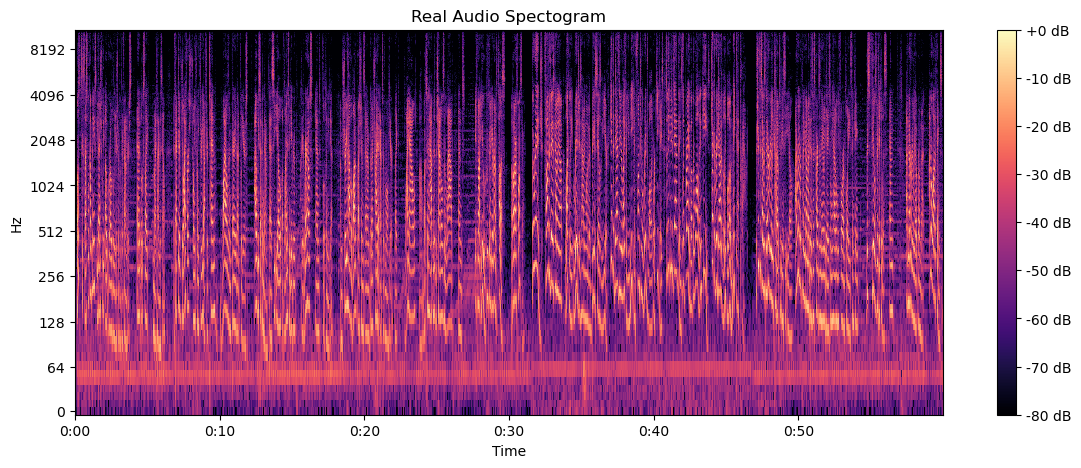

In [58]:
real_spec = np.abs(librosa.stft(real_ad))
real_spec = librosa.amplitude_to_db(real_spec, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_spec, sr=real_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Real Audio Spectogram")
plt.show()

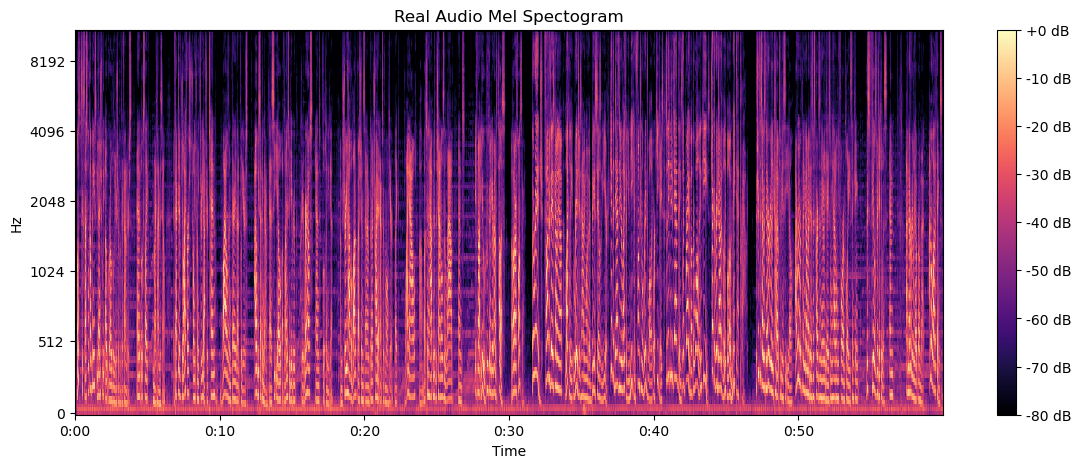

In [59]:
real_mel_spect = librosa.feature.melspectrogram(y=real_ad, sr=real_sr)
real_mel_spect = librosa.power_to_db(real_mel_spect, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mel_spect, y_axis="mel", x_axis="time")
plt.title("Real Audio Mel Spectogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

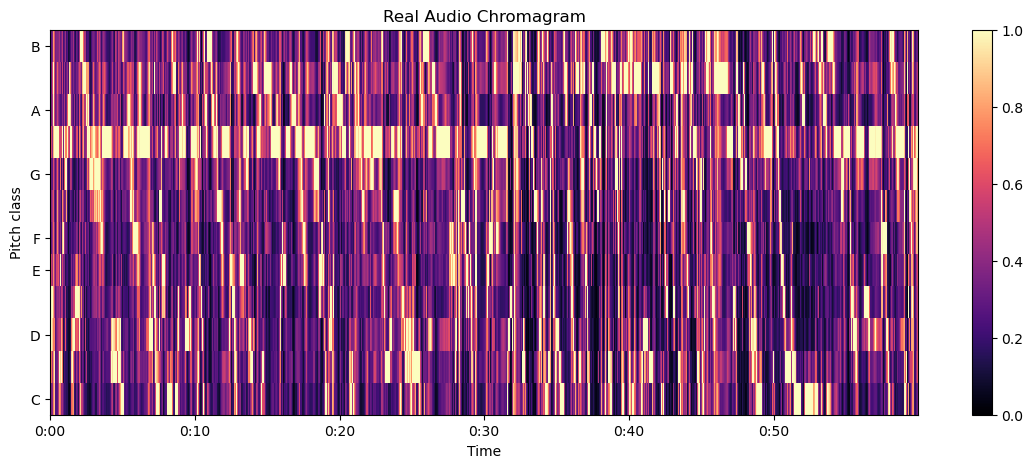

In [60]:
real_chroma = librosa.feature.chroma_cqt(y=real_ad, sr=real_sr, bins_per_octave=36)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_chroma, sr=real_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Real Audio Chromagram")
plt.show()

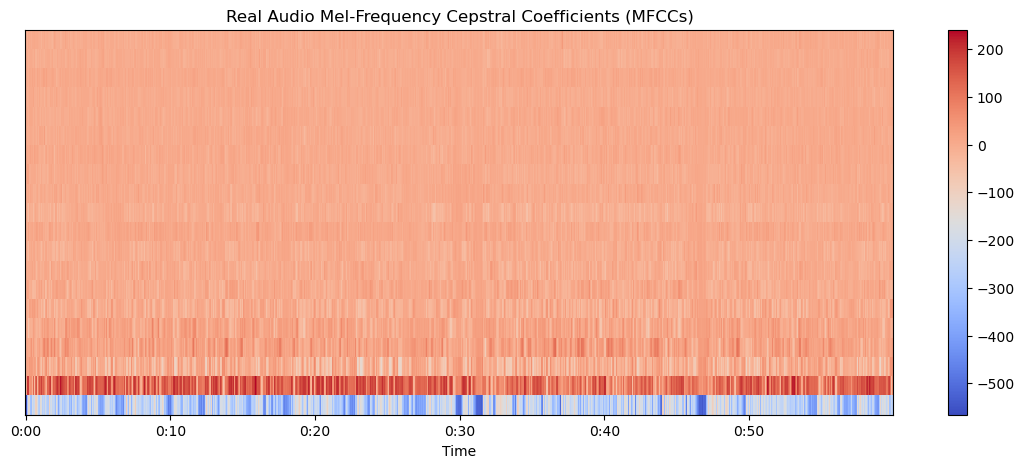

In [61]:
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

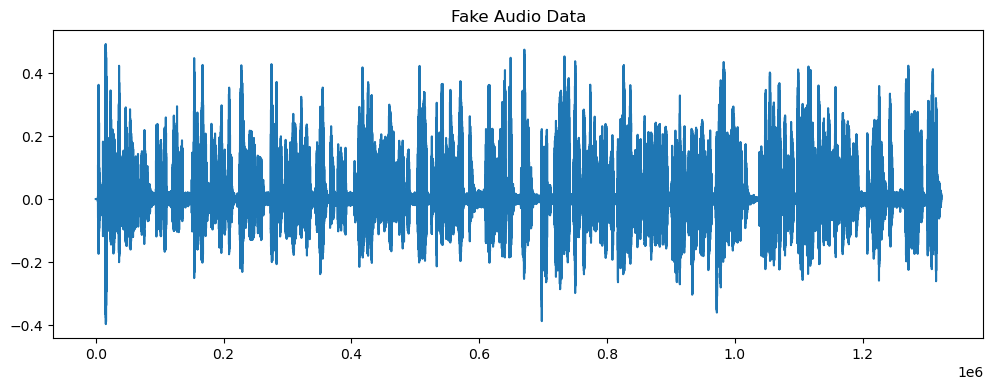

In [62]:
fake_ad, fake_sr = librosa.load(fake_audio)
plt.figure(figsize=(12, 4))
plt.plot(fake_ad)
plt.title("Fake Audio Data")
plt.show()

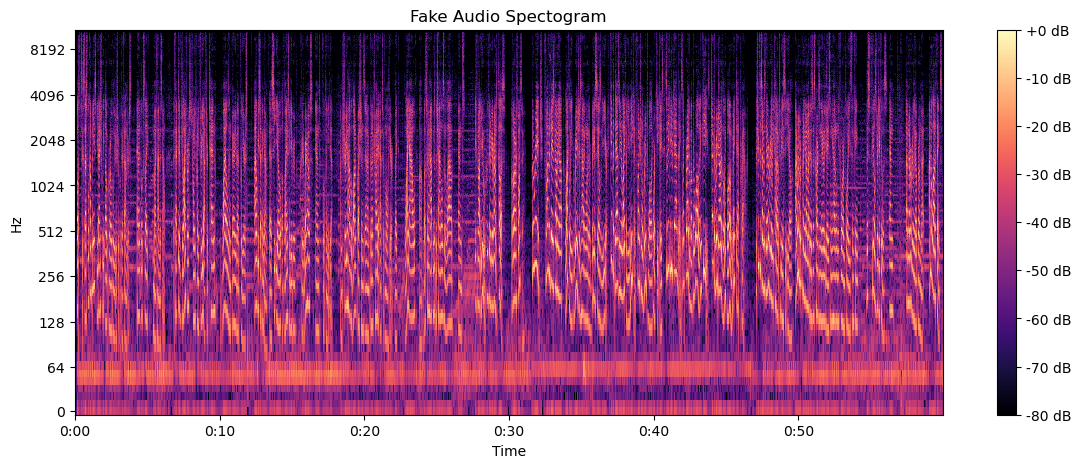

In [63]:
fake_spec = np.abs(librosa.stft(fake_ad))
fake_spec = librosa.amplitude_to_db(fake_spec, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_spec, sr=fake_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Fake Audio Spectogram")
plt.show()

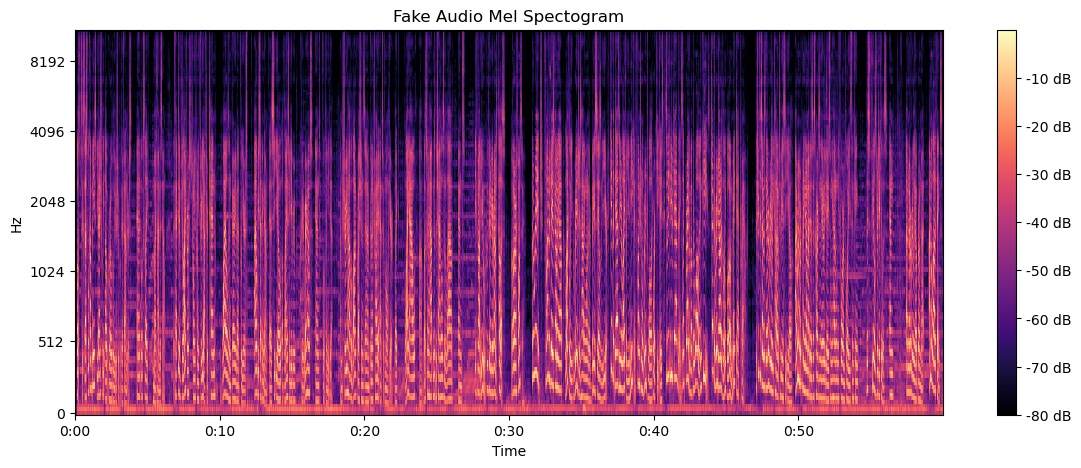

In [64]:
fake_mel_spect = librosa.feature.melspectrogram(y=fake_ad, sr=fake_sr)
fake_mel_spect = librosa.power_to_db(fake_mel_spect, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_mel_spect, y_axis="mel", x_axis="time")
plt.title("Fake Audio Mel Spectogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

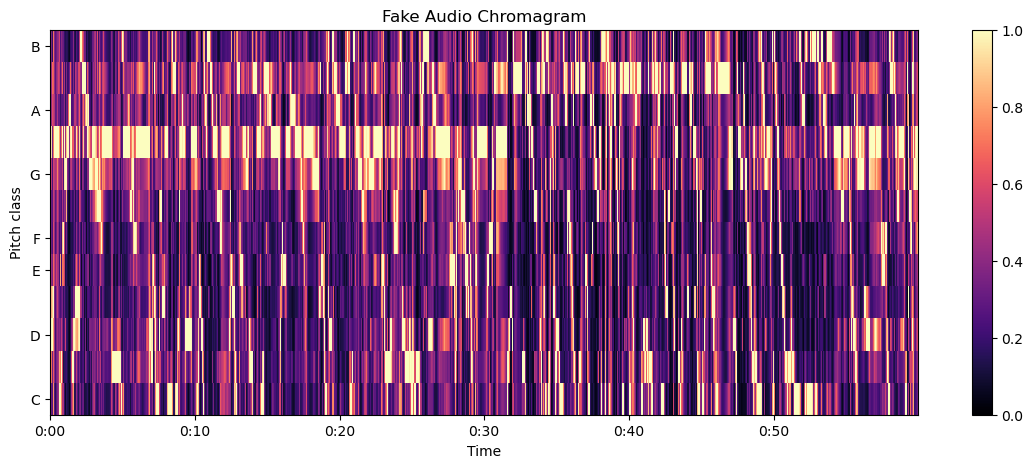

In [65]:
fake_chroma = librosa.feature.chroma_cqt(y=fake_ad, sr=fake_sr, bins_per_octave=36)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_chroma, sr=fake_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Fake Audio Chromagram")
plt.show()

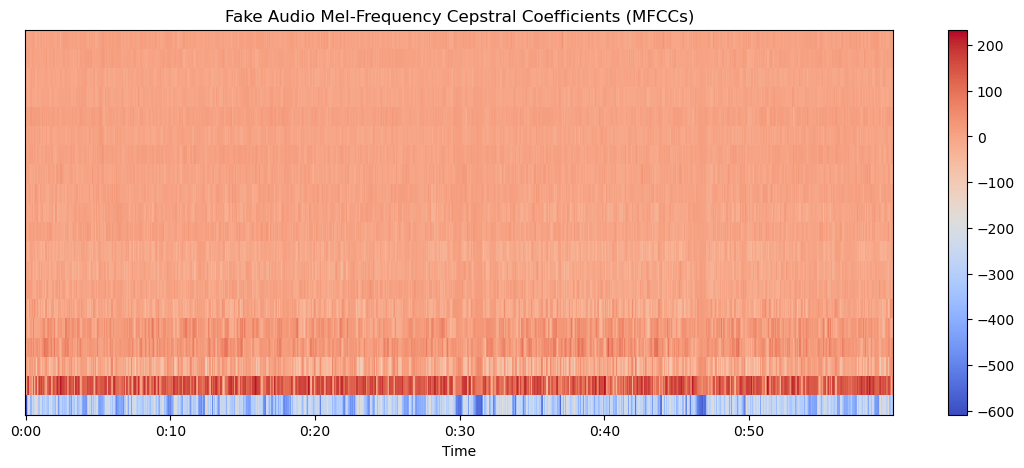

In [66]:
fake_mfccs = librosa.feature.mfcc(y=fake_ad, sr=fake_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_mfccs, sr=fake_sr, x_axis="time")
plt.colorbar()
plt.title("Fake Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

### 2.2 Mise en place du dataset

Nous allons créer notre dataframe constitué de la représentation numérique des audios et des labels selon que le fichier est dans le répertoire REAL ou FAKE

In [147]:
data = []
labels = []

for folder in folders:
    files = os.listdir(os.path.join(audio_files_path, folder))
    for file in tqdm(files):
        file_path = os.path.join(audio_files_path, folder, file)
        audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
        data.append(mfccs_features_scaled)
        labels.append(folder)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:32<00:00,  4.01s/it]


In [148]:
feature_df = pd.DataFrame({"features": data, "class": labels})


In [149]:
feature_df

features class
0   [-260.1085, 100.856926, -25.453163, -0.2690358...  FAKE
1   [-258.9036, 93.914345, -27.627075, -1.9326234,...  FAKE
2   [-268.50894, 118.533066, -38.89298, 13.812951,...  FAKE
3   [-272.68378, 101.50515, -22.251564, 4.101077, ...  FAKE
4   [-254.73932, 66.81036, -33.19487, -4.094302, -...  FAKE
..                                                ...   ...
59  [-248.25002, 168.32622, -16.75881, 21.82504, 1...  REAL
60  [-435.9615, 109.96818, -36.4604, 3.61992, -22....  REAL
61  [-353.45502, 102.8698, -17.037445, 13.006072, ...  REAL
62  [-343.5013, 48.16308, -7.313133, 21.132427, -2...  REAL
63  [-285.7228, 86.29614, -29.728287, 4.740103, -1...  REAL

[64 rows x 2 columns]

In [150]:
feature_df["class"].value_counts()

class
FAKE    56
REAL     8
Name: count, dtype: int64

Notre dataset comporte 56 audio FAKE contre 13 REAL

In [151]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [152]:
feature_df["class"] = label_encoder(feature_df["class"])

class ['FAKE' 'REAL']


In [153]:
X = np.array(feature_df["features"].tolist())
y = np.array(feature_df["class"].tolist())

In [154]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [155]:
y_resampled = to_categorical(y_resampled)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [157]:
num_labels = len(feature_df["class"].unique())
num_labels

2

In [226]:
input_shape = (feature_df["features"][0].shape[0],1)
input_shape

(40, 1)

### 2.3 Model

In [228]:
model = Sequential()
# Conv1D layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 38, 64)            256       
                                                                 
 batch_normalization_12 (Bat  (None, 38, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 19, 64)           0         
 g1D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 19, 64)            0         
                                                                 
 conv1d_16 (Conv1D)          (None, 17, 128)           24704     
                                                                 
 batch_normalization_13 (Bat  (None, 17, 128)        

In [216]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=2, epochs=100)

Epoch 1/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0999 - accuracy: 0.9775 - val_loss: 1.8364 - val_accuracy: 0.7391
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.5169 - val_accuracy: 0.7826
Epoch 3/100
45/45 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.6023 - val_accuracy: 0.7826
Epoch 4/100
45/45 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.5557 - val_accuracy: 0.7826
Epoch 5/100
45/45 [==============================] - 0s 7ms/step - loss: 0.2552 - accuracy: 0.9663 - val_loss: 1.1297 - val_accuracy: 0.7826
Epoch 6/100
45/45 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.3322 - val_accuracy: 0.7391
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.0174 - val_accuracy: 0.7826
Epoch 8/100
4

In [217]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 0s 24ms/step - loss: 1.0469 - accuracy: 0.7826
Test Loss: 1.046900749206543
Test Accuracy: 0.782608687877655


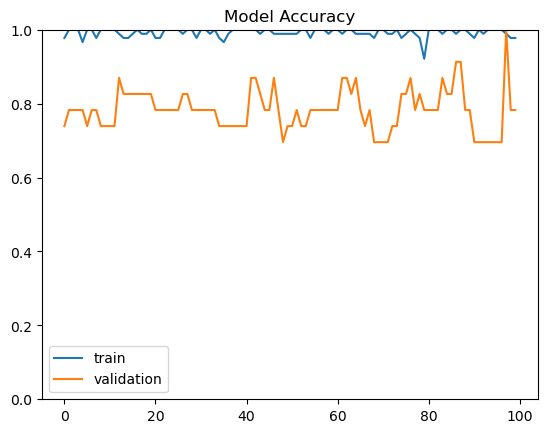

In [218]:
plt.figure()
plt.title("Model Accuracy")
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

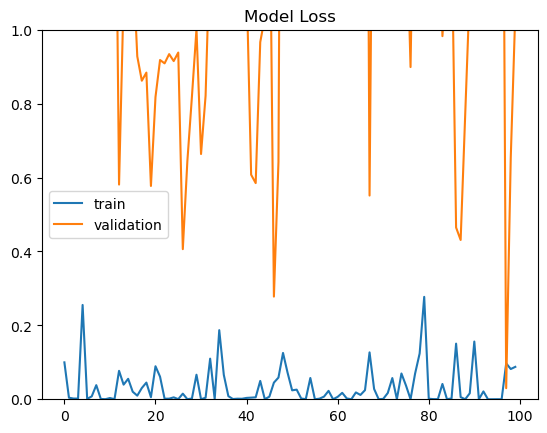

In [219]:
plt.figure()
plt.title("Model Loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

In [220]:
def detect_fake(filename):
    sound_signal, sample_rate = librosa.load(filename, res_type="kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfcc_features.T, axis=0)
    mfccs_features_scaled = mfccs_features_scaled.reshape(1, -1)
    result_array = model.predict(mfccs_features_scaled)
    print(result_array)
    result_classes = ["FAKE", "REAL"]
    result = np.argmax(result_array[0])
    print("Result:", result_classes[result])

In [221]:
test_real = "./DEMONSTRATION/linus-original-DEMO.mp3"
test_fake = "./DEMONSTRATION/linus-to-musk-DEMO.mp3"
fake_obama = "obama_1.wav"

In [222]:
detect_fake(test_real)

1/1 [==============================] - 0s 14ms/step
[[5.369827e-11 1.000000e+00]]
Result: REAL


In [223]:
detect_fake(test_fake)

1/1 [==============================] - 0s 15ms/step
[[1.000000e+00 5.687691e-37]]
Result: FAKE


In [224]:
detect_fake(fake_obama)

1/1 [==============================] - 0s 15ms/step
[[1.000000e+00 5.513686e-15]]
Result: FAKE


# CONCLUSION
Avec une Accuracy de 0.78, Notre modèle detecte bien les DEEPFAKE